## Model 3
- Outliers removed and analysed separately
- Resale Price is also logged
- Retains pri and sec sch


## Project Scoping, EDA, cleaning and feature engineering


---

### Problem Statement

One of Singapore's leading property web portals PropertyGuru would like to publish a data-driven report on factors affecting home resale prices in Singapore, in a bid to drive website traffic up in the face of competition from other websites like 99co and Stacked Homes. They hope that new property agents will use the report to deepen their understanding of historical market transactions, as well as improve their knowledge and credibility when conversing with potential clients. People looking to buy their first property in Singapore will also be interested in the content, and use it to inform their decisions on where to purchase their desired property. <br>

PropertyGuru is interested to highlight the top factors that most strongly influence property resale prices. Regression models, which are known for their ease of interpretability, are suitable models for predicting property resale prices in Singapore in a way that is understood easily by the typical consumer. <br>

Success to PropertyGuru would be higher brand awareness, an uptick in website traffic after the guide has been posted, and high download rates of final report.

---

### External Research

Location is a primary consideration when it comes to real estate. The presence and proximity of amenities and lifestyle choices affect property resale prices, and in Singapore the following factors are known to be especially important influencers of property purchase decisions:

- Proximity to quality local schools for young families
- Proximity to workplaces (which explains why property prices have a positive relationship with closeness to the Central Business District)
- Proximity to social, shopping and recreational centres 
- Flat condition
- Lease duration
- Flat size
- Estate maturity

These factors are not truly independent of each other. For example, working professionals with young children will not just want access to good schools but also an easy commute to work, and access to shopping centres, affordable food, or recreational services. 

There is also a growing trend of public housing resale prices exceeding SGD 1M in recent years. 2021 saw a record 259 million-dollar HDB resale flats transactions, a stark increase from 82 in 2020. There were a record number of 111 HDB resale flat transactions that breached the million-dollar mark in the third quarter of 2022. 

Source: [Redbrick SG](https://www.redbrick.sg/blog/what-affects-real-estate-prices/) and [ChannelNews Asia](https://www.channelnewsasia.com/singapore/hdb-resale-flat-prices-strong-demand-million-dollar-transactions-property-3030186)

---

### Data Cleaning & EDA

- Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

In [112]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import missingno as msno
import haversine as hs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
# Set max views for columns and rows for ease of EDA

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.set_option('mode.chained_assignment', None)

In [114]:
housing = pd.read_csv('./datasets/train.csv', low_memory=False)
housing.shape

(150634, 78)

In [115]:
housing.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [5]:
housing.drop(columns = ['price_per_sqft'], inplace = True)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [7]:
# Summary stats

housing.describe(include = 'all')

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
count,150634.000000,150634,150634,150634,150634,150634,150634,150634.00000,150634,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634,150634,150634,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634,149805.000000,57845.000000,125208.000000,148694.000000,150634.000000,53244.000000,89766.000000,121432.000000,150634.00000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000
unique,NaN,110,26,7,2514,553,25,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,9157,NaN,NaN,NaN,NaN,1,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9125,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,1657,NaN,NaN,NaN,177,NaN,NaN,NaN,NaN,NaN,134,NaN,NaN,NaN,NaN
top,NaN,2018-07,JURONG WEST,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 ROOM Model A,"91, TANGLIN HALT RD",NaN,NaN,NaN,NaN,Y,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142091,NaN,NaN,Jurong West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Punggol,NaN,NaN,NaN,NaN,NaN,Blk 121,NaN,NaN,NaN,Marsiling Primary School,NaN,NaN,NaN,NaN,NaN,Bendemeer Secondary School,NaN,NaN,NaN,NaN
freq,NaN,2088,11451,61136,579,2451,34699,NaN,46261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35127,106,NaN,NaN,NaN,NaN,150634,121815,150619,150592,150499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,NaN,NaN,11451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7671,NaN,NaN,NaN,NaN,NaN,774,NaN,NaN,NaN,2075,NaN,NaN,NaN,NaN,NaN,3384,NaN,NaN,NaN,NaN
mean,93047.887496,NaN,NaN,NaN,NaN,NaN,NaN,97.19763,NaN,1992.448464,4.491615e+05,2016.489551,6.580500,8.284823,7.248370,9.321275,8.284823,NaN,NaN,1046.235290,28.551536,15.139816,1990.922906,NaN,NaN,NaN,NaN,NaN,124.683312,0.138813,1.782055,39.219366,50.083978,26.299853,5.940770,0.023972,0.448564,0.063678,0.622516,0.059409,0.000339,NaN,1.366224,103.839391,NaN,664.239826,1.269237,2.149623,5.236486,1173.700148,1.382672,2.358766,4.704122,48.65298,58.138322,765.007872,NaN,0.546364,0.264024,1.365667,103.839400,115.258966,NaN,1.366231,103.839369,395.172974,NaN,55.368190,0.113195,1.366268,103.839106,508.533220,NaN,210.146428,0.031879,1.365986,103.839340
std,53679.906247,NaN,NaN,NaN,NaN,NaN,NaN,24.40304,NaN,12.138829,1.433076e+05,2.752396,3.345468,5.508074,5.515155,5.507364,5.508074,NaN,NaN,262.674321,12.138829,6.232492,12.202185,NaN,NaN,NaN,NaN,NaN,58.349670,5.947970,11.713826,68.748273,45.

In [8]:
# Converting id to categorical so it doesn't get mistakenly pre-processed

housing['id'] = housing['id'].astype('object')

In [9]:
# Identifying numerical columns

housing_num = housing.select_dtypes("number")
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 56 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   floor_area_sqm             150634 non-null  float64
 1   lease_commence_date        150634 non-null  int64  
 2   resale_price               150634 non-null  float64
 3   Tranc_Year                 150634 non-null  int64  
 4   Tranc_Month                150634 non-null  int64  
 5   mid_storey                 150634 non-null  int64  
 6   lower                      150634 non-null  int64  
 7   upper                      150634 non-null  int64  
 8   mid                        150634 non-null  int64  
 9   floor_area_sqft            150634 non-null  float64
 10  hdb_age                    150634 non-null  int64  
 11  max_floor_lvl              150634 non-null  int64  
 12  year_completed             150634 non-null  int64  
 13  total_dwelling_units       15

Text(0.5, 1.0, 'Correlation Heatmap of Variables')

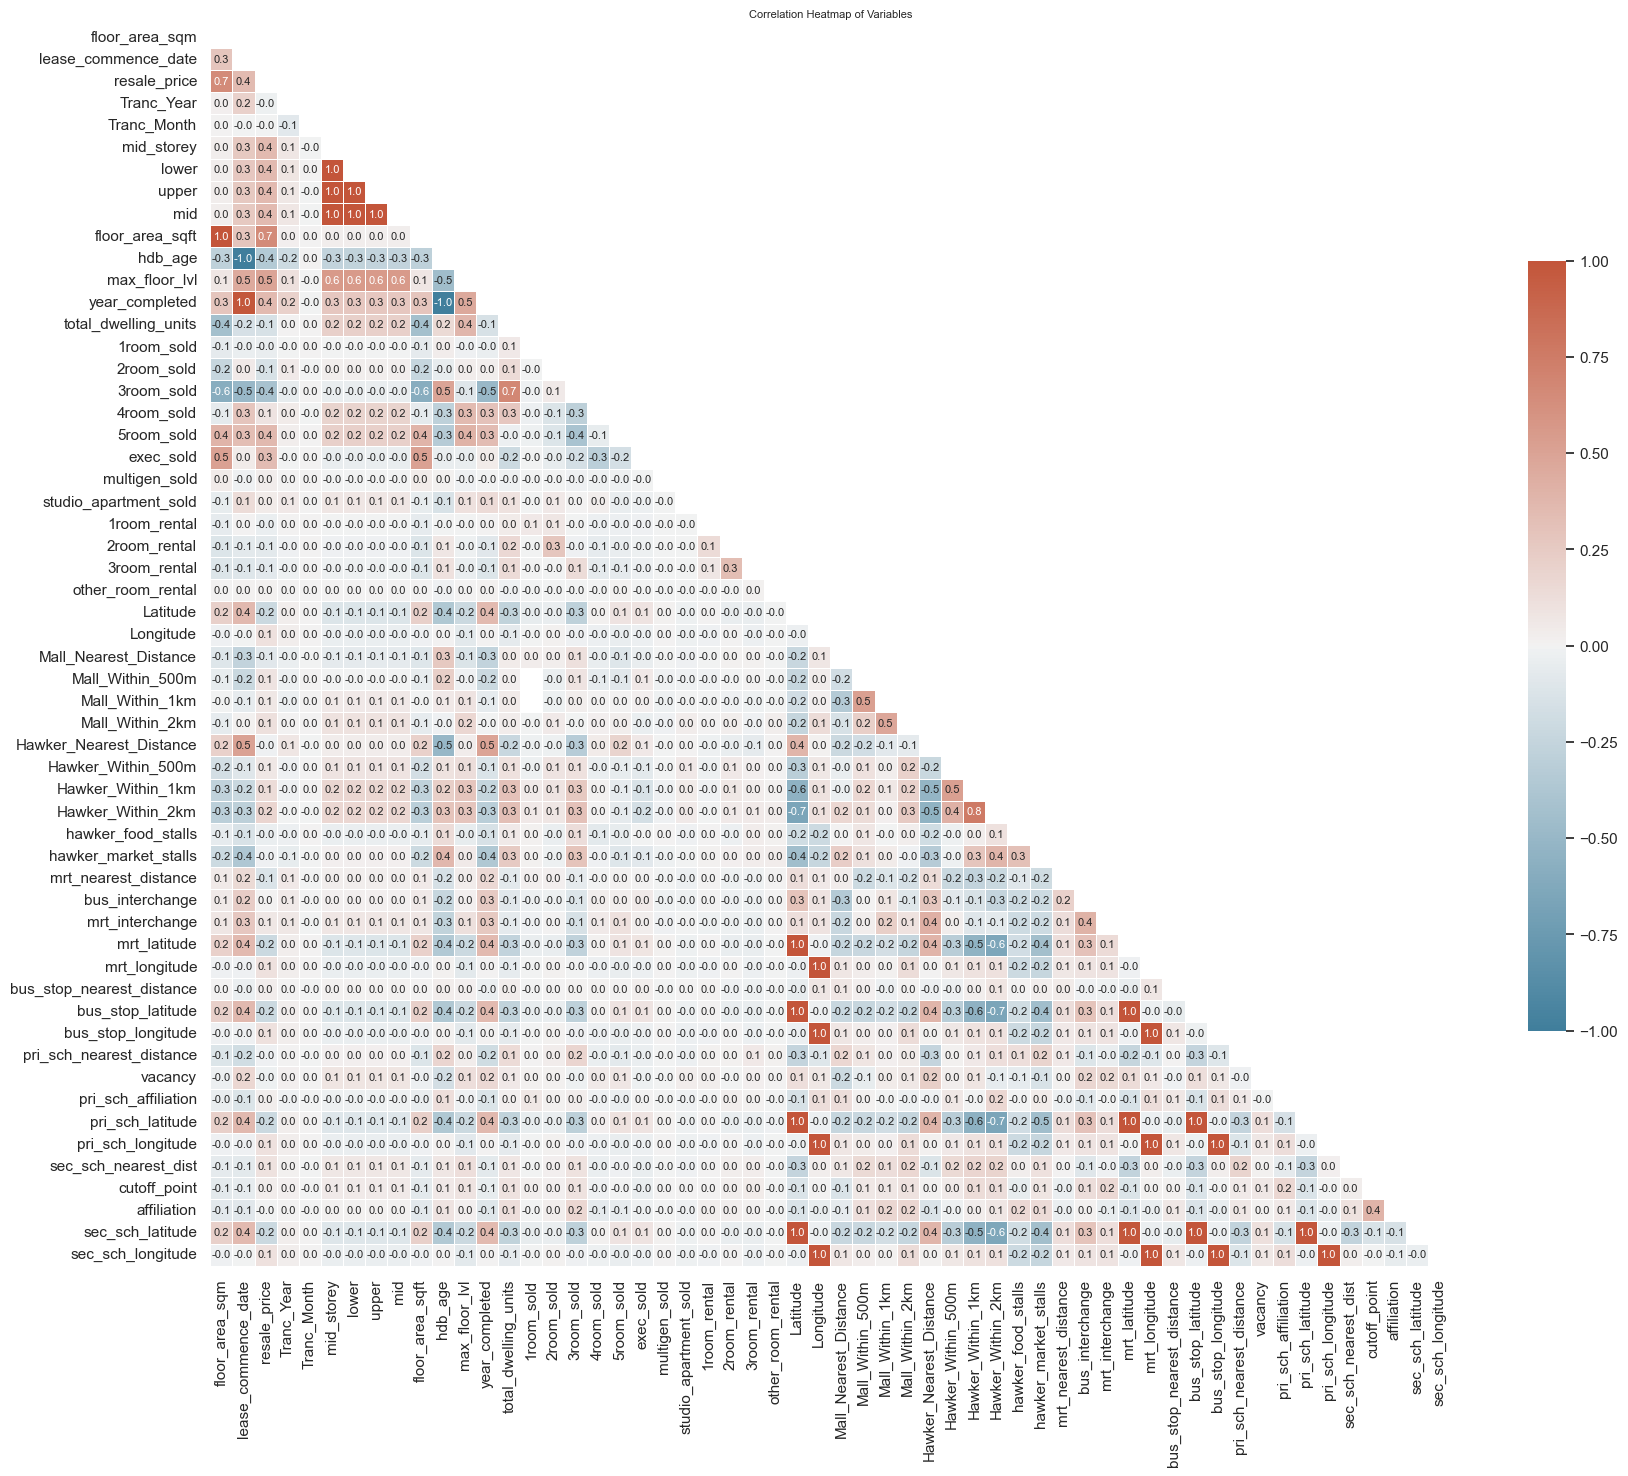

In [10]:
# Correlation of all numerical variables to observe the relationships between them 
# and see if there is multicollinearity between any 2 variables

sns.set_theme(style="white")
corr = housing_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, fmt = '.1f',
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":8})
plt.title('Correlation Heatmap of Variables', fontsize=8)

### Examining the dependent variable

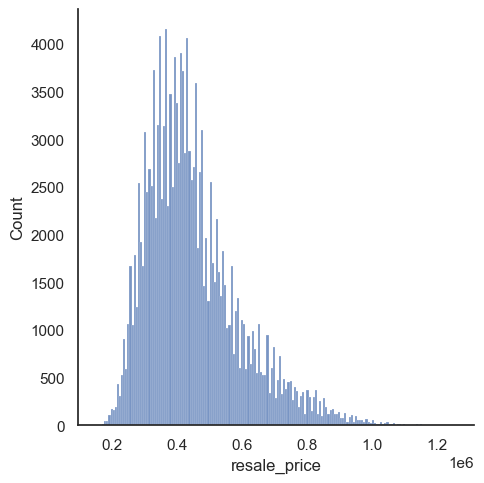

In [11]:
sns.displot(data=housing, x="resale_price")

<AxesSubplot: xlabel='resale_price'>

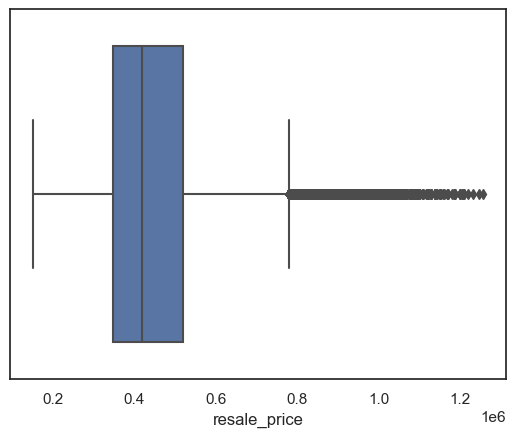

In [12]:
sns.boxplot(data=housing, x="resale_price")

Resale price has a right skew that reflects a small number of housing units being sold at a very high price of approximately more than SGD 800,000. 

In [13]:
# Removing outliers in the dependent variable and analysing them separately

# Q1 = np.percentile(housing['resale_price'] , 25)
# Q3 = np.percentile(housing['resale_price'] , 75)
# IQR = Q3 - Q1
# ul = Q3+1.5*IQR
# outliers = housing['resale_price'][(housing['resale_price'] > ul)]
# outliers_df = housing.iloc[outliers.index]



In [14]:
# Looking at the type and location of units that form the outliers

# pd.pivot_table(outliers_df, values = 'resale_price', index = 'full_flat_type', columns = 'town').reset_index()

Housing types that constitute outliers in terms of resale price tend to be larger in size (4-room, 5-room, executive or multi-generation units) located mostly in mature estates. Given that the model we're trying to build is meant to predict the price of a typical home unit, we'll extract these outliers to be studied separately from the main dataset. 

In [15]:
# Dropping outliers for resale price

# housing.drop(outliers.index, inplace = True)

In [16]:
# Log transforming the dependent variable to normalise the distribution and reduce the outlier effect 

housing["resale_price_log"] = np.log(housing["resale_price"])

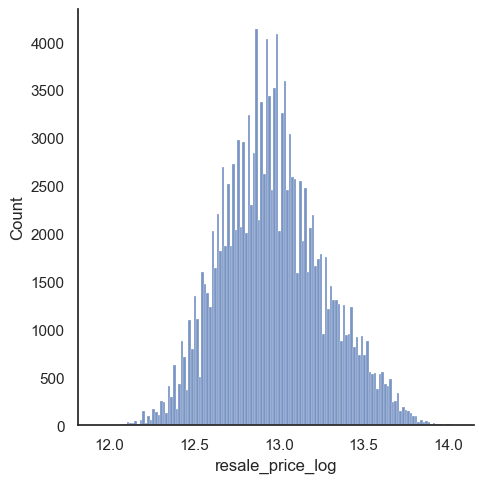

In [17]:
# Looking once again at the distribution of resale price

sns.displot(data=housing, x="resale_price_log")

It resembles a normal curve alot more now, which fulfills an assumption for linear regression.

### Checking for Missing Data and handling them

In [18]:
# Checking for columns with null data.

housing.isna().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units

Missing data is primarily in the variables relating to mall and hawker distances. Visualising the missing data to see how extensive it is:

<AxesSubplot: >

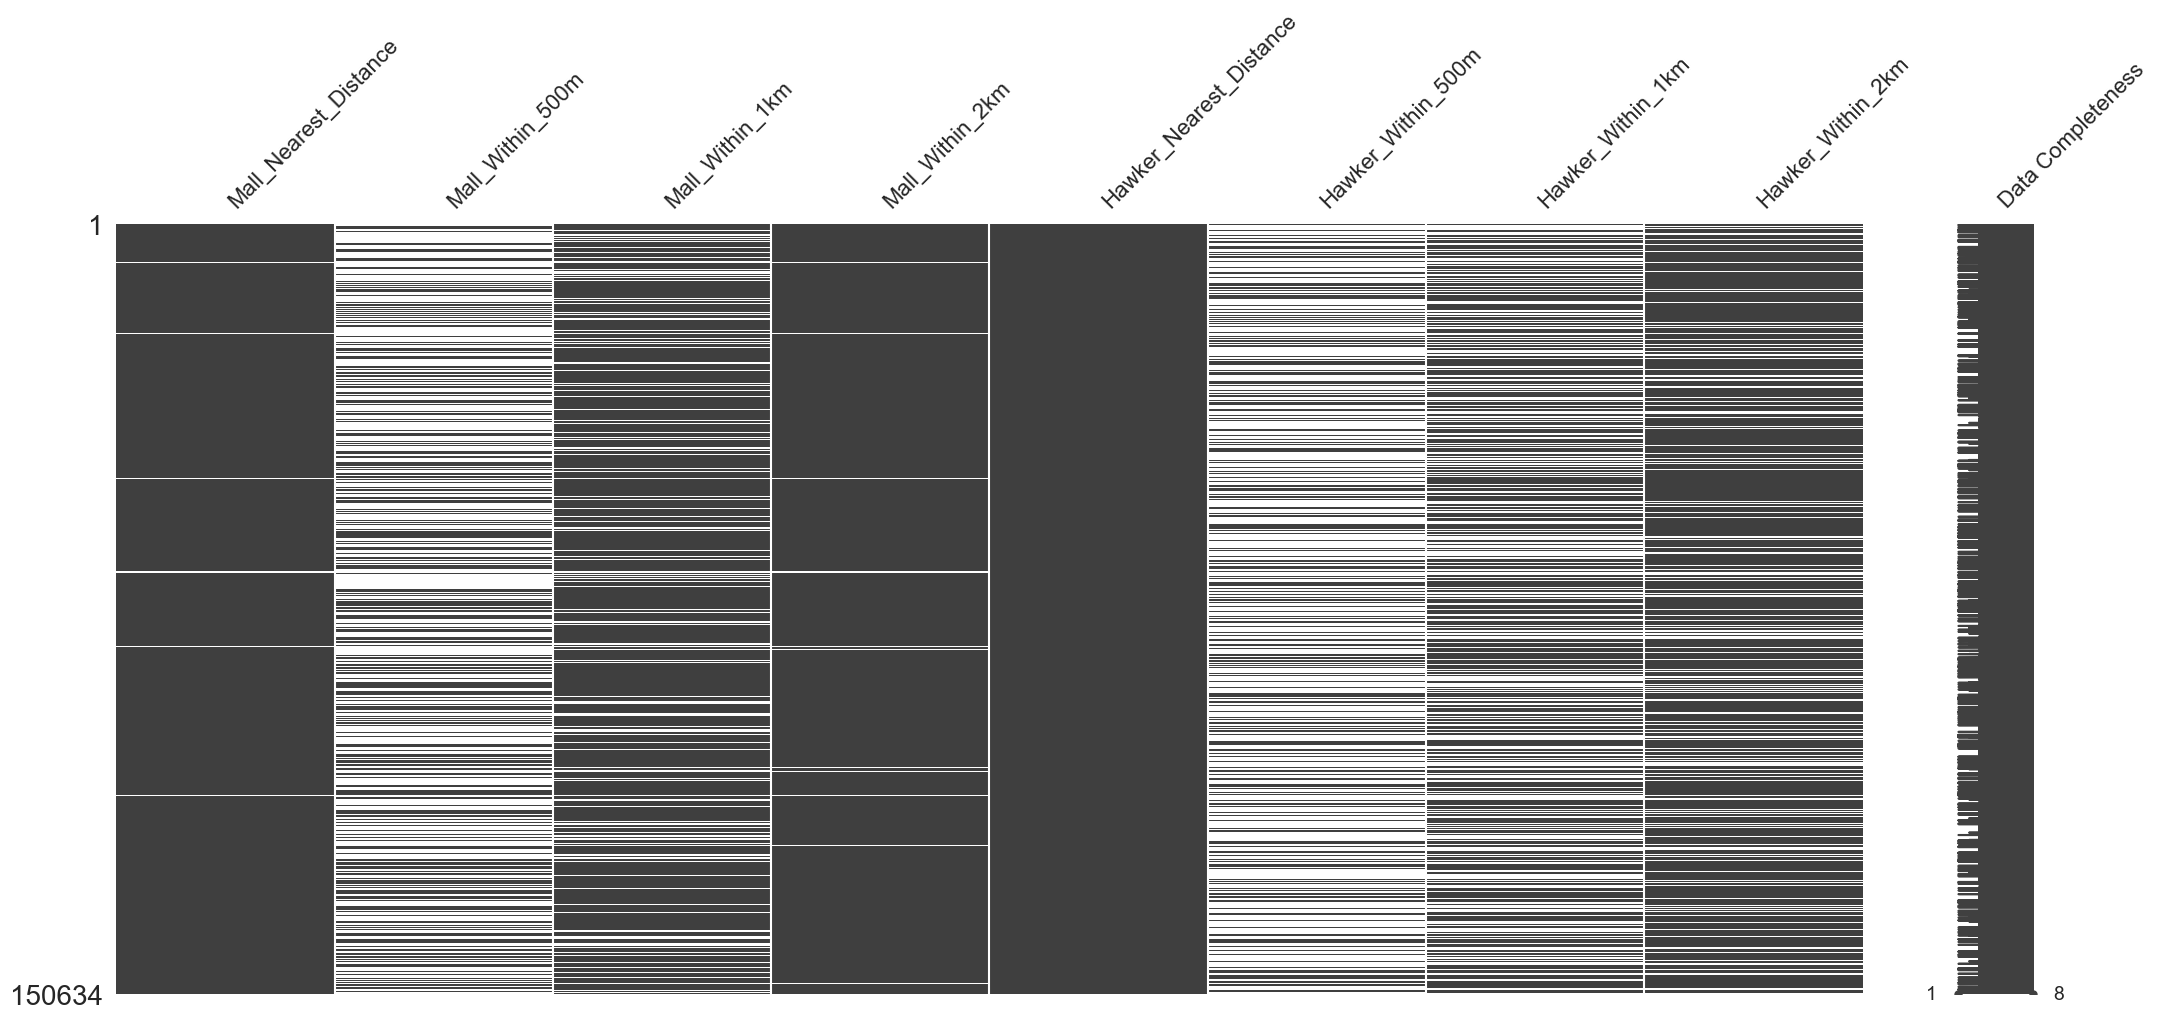

In [19]:
# Visualising missing data in columns with missing data

to_check = housing[['Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km']]

msno.matrix(to_check, labels = True)

There are rows with supposedly blank values for mall nearest distance, but have counts for malls within 500m, 1km etc. We will drop these rows as the missing values are likely to be due to errors during data collection, since there should be data in the nearest distance column but it is blank. We're also unable to ascertain distance to the nearest mall just by looking at the counts of the malls within each radius. The impact on the number of observations is minimal since this issue only affects a few rows.

In [20]:
# Dropping rows

no_mall_distance = housing[(housing['Mall_Nearest_Distance'].isnull()) & 
                           (housing['Mall_Within_500m'].isnull())]
to_drop = no_mall_distance.index
housing.drop(to_drop, inplace = True)

In [21]:
housing.isna().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units

Are there rows that should contain data but do not?

In [22]:
# Should the missing values under the columns on malls within a certain radius have values?

housing[housing['Mall_Within_500m'].isnull() & (housing['Mall_Nearest_Distance'] <= 500)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,resale_price_log


In [23]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_1km'].isnull() & (housing['Mall_Nearest_Distance'] <= 1000)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,resale_price_log


In [24]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_2km'].isnull() & (housing['Mall_Nearest_Distance'] <= 2000)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,resale_price_log


It seems that most of the missing values are because there are actually no malls within that given distance. We'll replace the missing values with 0.

In [25]:
# Remaining NaN values can be replaced by 0 as the figures correspond with the nearest distance

housing['Mall_Within_500m'].fillna(0, inplace = True)
housing['Mall_Within_1km'].fillna(0, inplace = True)
housing['Mall_Within_2km'].fillna(0, inplace = True)

The same checks are conducted for the hawker-related distance variables.

In [26]:
# Looking at the missing values for hawker distances, seems to be similar to mall distances:

housing[housing['Hawker_Within_500m'].isnull()]

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,resale_price_log
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,13.407542
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,13.638773
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934,13.217674
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,12.604849
6,173300,2018-05,HOUGANG,5 ROOM,641,HOUGANG AVE 8,07 TO 09,120.0,Improved,1987,433000.0,2018,5,8,7,9,8,5 ROOM Improved,"641, HOUGANG AVE 8",1291.680,34,17,1986,Y,N,N,N,N,64,0,0,0,0,64,0,0,0,0,0,0,0,530641,1.371276,103.880059,Hougang,490.262931,1.0,1.0,8.0,516.981824,NaN,1.0,4.0,40,0,1370.648274,Kovan,0,0,1.359703,103.884303,46.567429,Blk 639,1.370877,103.880187,331.669318,Xinmin Primary School,48,0,1.371415,103.883039,294.826501,Bowen Secondary School,224,0,1.370751,103.877459,12.978493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150628,162877,

In [27]:
# Should the missing values under the columns on hawker within a certain radius have values?
housing[housing['Hawker_Within_500m'].isnull() & (housing['Hawker_Nearest_Distance'] <= 500)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,resale_price_log


In [28]:
housing[housing['Hawker_Within_1km'].isnull() & (housing['Hawker_Nearest_Distance'] <= 1000)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,resale_price_log


In [29]:
housing[housing['Hawker_Within_2km'].isnull() & (housing['Hawker_Nearest_Distance'] <= 2000)]


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,resale_price_log


In [30]:
# Same as the mall variables, so we will replace NaN with 0

housing['Hawker_Within_500m'].fillna(0, inplace = True)
housing['Hawker_Within_1km'].fillna(0, inplace = True)
housing['Hawker_Within_2km'].fillna(0, inplace = True)

### Cleaning, EDA and feature engineering for numerical variables

#### 1. Longitude and latitude

Based on external research, the factors affecting property resale price include distance from workplaces, the majority of which are located in the CBD district. We can try getting the approximate straight-line distance between each unit and the CBD. 

In [31]:
# Taking Tanjong Pagar as proxy for CBD

housing['CBD_latitude'] = [1.275619 for x in housing['Latitude']]
housing['CBD_longitude'] = [103.842431 for x in housing['Longitude']]

In [32]:
# Formula for straight line distance based on latitude and longitude

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [33]:
# Creating a new column for distance from CBD

housing['distance_from_CBD'] = haversine_np(housing['Latitude'],housing['Longitude'],housing['CBD_latitude'],housing['CBD_longitude'])

We can use the distance variables to account for distance from these amenities from the unit instead of relying on the raw latitude/longitude. We will drop the variables for postal code, latitude and longitude since there are other existing variables that can be substituted instead and have higher interpretability in a regression model. 


In [34]:
# Dropping all latitude, longitude and postal code

housing.drop(columns = ['Latitude', 'Longitude','mrt_latitude', 'mrt_longitude',
                        'bus_stop_latitude','bus_stop_longitude','pri_sch_latitude','pri_sch_longitude',
                        'sec_sch_longitude','sec_sch_latitude','postal','CBD_latitude','CBD_longitude'], inplace = True)

#### 2. Checking for data sparsity

A feature without much variance provides little information to the model, especially if it also has almost no correlation with the target variable.

In [35]:
# Checking variables for potential sparsity by seeing which columns have the high percentage of 0s

print('cols')
col_sparsity = housing[housing == 0].count(axis=0)/len(housing.index)
print(col_sparsity[col_sparsity >0.5])

cols
1room_sold               0.999453
2room_sold               0.958533
3room_sold               0.635520
exec_sold                0.826328
multigen_sold            0.999486
studio_apartment_sold    0.990868
1room_rental             0.997991
2room_rental             0.987564
3room_rental             0.974453
other_room_rental        0.999786
Mall_Within_500m         0.613865
Hawker_Within_500m       0.645386
mrt_interchange          0.738547
pri_sch_affiliation      0.886813
affiliation              0.968065
dtype: float64


In [36]:
# Looking at how the variables correlate with resale price

round(housing[housing.columns[1:]].corr()['resale_price'][:],2)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_11170/3809399179.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(housing[housing.columns[1:]].corr()['resale_price'][:],2)


floor_area_sqm               0.66
lease_commence_date          0.35
resale_price                 1.00
Tranc_Year                  -0.02
Tranc_Month                 -0.01
mid_storey                   0.35
lower                        0.35
upper                        0.35
mid                          0.35
floor_area_sqft              0.66
hdb_age                     -0.35
max_floor_lvl                0.50
year_completed               0.35
total_dwelling_units        -0.14
1room_sold                  -0.04
2room_sold                  -0.15
3room_sold                  -0.41
4room_sold                   0.09
5room_sold                   0.36
exec_sold                    0.34
multigen_sold                0.04
studio_apartment_sold        0.04
1room_rental                -0.04
2room_rental                -0.08
3room_rental                -0.08
other_room_rental            0.01
Mall_Nearest_Distance       -0.09
Mall_Within_500m             0.09
Mall_Within_1km              0.08
Mall_Within_2k

In [37]:
# dropping columns due to sparsity of data (more than 50% missing) and low correlation with resale price (< 0.1)

housing.drop(columns = ['Mall_Within_500m', 'Hawker_Within_500m', 'mrt_interchange',
                        'affiliation', 'pri_sch_affiliation', '1room_rental','2room_rental', 
                        '3room_rental', 'other_room_rental'], inplace = True)

#### 3. Examining variables relating to rooms sold

In [38]:
# Checking for correlation 

housing.loc[:,['1room_sold', '2room_sold','3room_sold',
               '4room_sold', '5room_sold', 'exec_sold',
               'multigen_sold','studio_apartment_sold',
               'total_dwelling_units','resale_price']].corr()

,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,total_dwelling_units,resale_price
1room_sold,1.000000,-0.003536,-0.012669,-0.025829,-0.018381,-0.007289,-0.000495,-0.001936,0.055149,-0.039488
2room_sold,-0.003536,1.000000,0.052072,-0.123623,-0.116251,-0.047019,-0.003199,0.051830,0.144132,-0.146455
3room_sold,-0.012669,0.052072,1.000000,-0.293116,-0.399753,-0.163100,-0.010533,0.006373,0.678721,-0.411948
4room_sold,-0.025829,-0.123623,-0.293116,1.000000,-0.050565,-0.297222,-0.021018,0.027140,0.264063,0.088682
5room_sold,-0.018381,-0.116251,-0.399753,-0.050565,1.000000,-0.161198,-0.016628,-0.039260,-0.029044,0.360818
exec_sold,-0.007289,-0.047019,-0.163100,-0.297222,-0.161198,1.000000,-0.006593,-0.025761,-0.203431,0.339819
multigen_sold,-0.000495,-0.003199,-0.010533,-0.021018,-0.016628,-0.006593,1.000000,-0.001751,-0.022057,0.037608
studio_apartment_sold,-0.001936,0.051830,0.006373,0.027140,-0.039260,-0.025761,-0.001751,1.000000,0.096029,0.041589
total_dwelling_units,0.055149,0.144132,0.678721,0.264063,-0.029044,-0.203431,-0.022057,0.096029,1.000000,-0.144782
resale_price,-0.039488,-0.146455,-0.411948,0.088682,0.360818,0.339819,0.037608,0.041589,-0.144782,1.000000


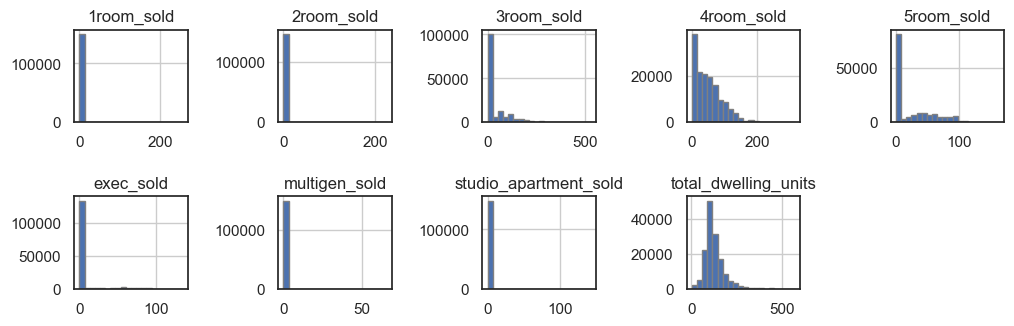

In [39]:
# Examining distributions of variables relating to rooms sold

housing_num = housing[['1room_sold', '2room_sold','3room_sold',
               '4room_sold', '5room_sold', 'exec_sold',
               'multigen_sold','studio_apartment_sold',
               'total_dwelling_units']]
housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


Most of the variables for number of rooms sold are very sparse, with a high number of 0s, other than 4-room and 5-room units. We will try combining some of these variables and look at their relationship with resale price. 

In [40]:
housing['1_2_3_rooms_sold'] = housing['1room_sold'] + housing['2room_sold'] + housing['3room_sold']
housing['4_5_other_rooms_sold'] = housing['4room_sold'] + housing['5room_sold'] + housing['exec_sold'] + housing['multigen_sold'] + housing['studio_apartment_sold']

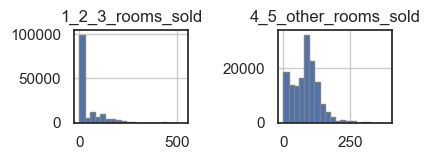

In [41]:
# Examining distributions of variables relating to rooms sold

housing_num = housing[['1_2_3_rooms_sold', '4_5_other_rooms_sold']]

housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


In [42]:
# We will drop these columns from analysis since they've been transformed
# Also dropping total dwelling units since they're highly correlated

housing.drop(columns = ['1room_sold', '2room_sold','3room_sold', '4room_sold', '5room_sold', 'exec_sold', 
                        'multigen_sold','studio_apartment_sold','total_dwelling_units'], inplace = True)

#### 4. Examining variables relating to distance from malls

In [43]:
# Looking at Mall distance variables

housing[['Mall_Nearest_Distance', 'Mall_Within_1km','Mall_Within_2km']].head()

,Mall_Nearest_Distance,Mall_Within_1km,Mall_Within_2km
0,1094.090418,0.0,7.0
1,866.941448,1.0,3.0
2,1459.579948,0.0,4.0
3,950.175199,1.0,4.0
4,729.771895,1.0,2.0


In [44]:
# Checking for correlation between mall distance features

housing.loc[:,['Mall_Nearest_Distance', 'Mall_Within_1km','Mall_Within_2km', 'resale_price']].corr()

,Mall_Nearest_Distance,Mall_Within_1km,Mall_Within_2km,resale_price
Mall_Nearest_Distance,1.000000,-0.582816,-0.182703,-0.087096
Mall_Within_1km,-0.582816,1.000000,0.436249,0.083842
Mall_Within_2km,-0.182703,0.436249,1.000000,0.114916
resale_price,-0.087096,0.083842,0.114916,1.000000


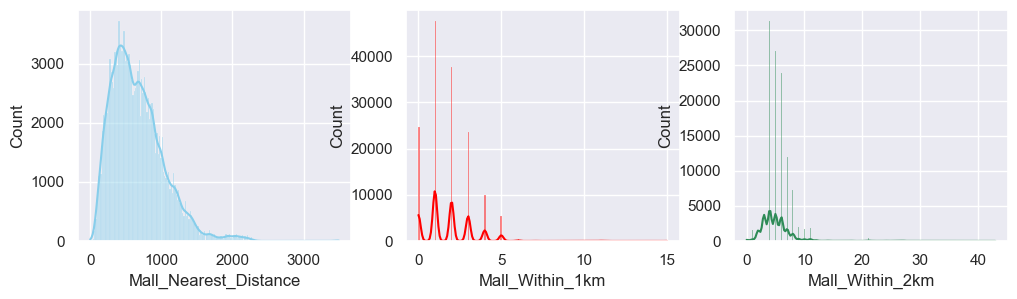

In [45]:
# Looking at the mall distance variables' distributions

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
df = housing
 
sns.histplot(data=df, x="Mall_Nearest_Distance", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Mall_Within_1km", kde=True, color="red", ax=axs[1])
sns.histplot(data=df, x="Mall_Within_2km", kde=True, color="seagreen", ax=axs[2])

plt.show()

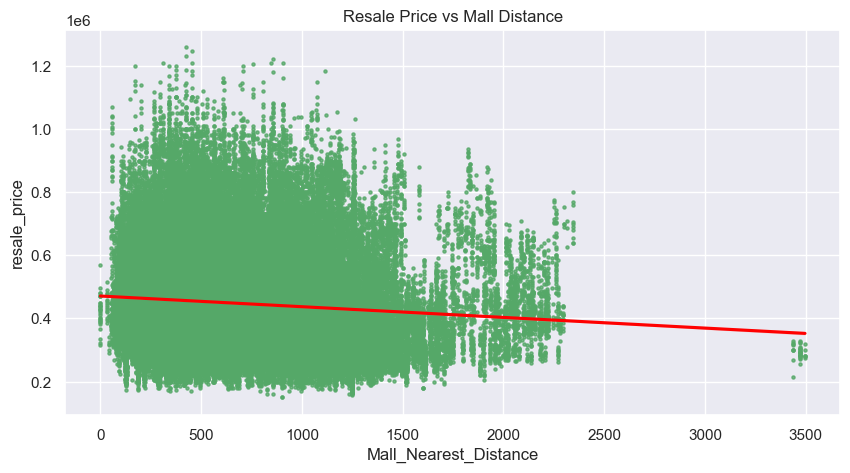

In [46]:
# Relationship between resale price and unit's distance from a mall

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="Mall_Nearest_Distance", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Mall Distance');

Distance from a mall seems inversely correlated with resale price, so we will keep this variable.
Since 'Mall_Within_500m' and  'Mall_Within_1km' are both highly correlated with 'Mall_Within_2km', and the last one is best correlated with the dependent variable, we will drop the first 2 and just use Mall within 2km to see if the number of malls within a 2km radius impacts resale price.

In [47]:
housing.drop(columns = 'Mall_Within_1km', inplace = True)

#### 5. Examining variables relating to distance from hawkers¶

In [48]:
# Checking for correlation between hawker distance features

housing.loc[:,['Hawker_Nearest_Distance', 'Hawker_Within_1km', 'Hawker_Within_2km', 'resale_price']].corr()

,Hawker_Nearest_Distance,Hawker_Within_1km,Hawker_Within_2km,resale_price
Hawker_Nearest_Distance,1.000000,-0.605385,-0.595827,-0.016078
Hawker_Within_1km,-0.605385,1.000000,0.830123,0.090727
Hawker_Within_2km,-0.595827,0.830123,1.000000,0.182935
resale_price,-0.016078,0.090727,0.182935,1.000000


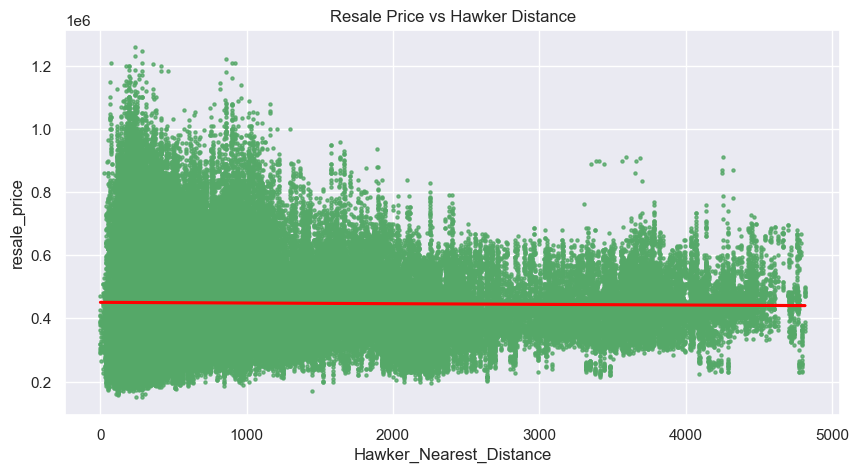

In [49]:
# Examining relationship between resale price and unit's distance from hawkers

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="Hawker_Nearest_Distance", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Hawker Distance');

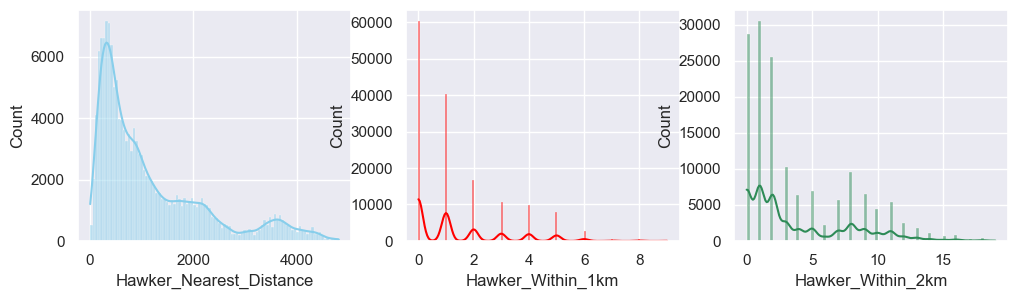

In [50]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
df = housing
 
sns.histplot(data=df, x="Hawker_Nearest_Distance", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Hawker_Within_1km", kde=True, color="red", ax=axs[1])
sns.histplot(data=df, x="Hawker_Within_2km", kde=True, color="seagreen", ax=axs[2])

plt.show()

In [51]:
# Will do the same for hawkers 

housing.drop(columns = 'Hawker_Within_1km', inplace = True)

#### 5. Examining variables relating to unit size and amenities

In [52]:
# Looking at variables relating to unit size and profile

housing[['storey_range','floor_area_sqm', 'lease_commence_date', 'mid_storey', 
         'lower', 'upper', 'mid','floor_area_sqft', 'hdb_age','max_floor_lvl', 
         'year_completed', 'commercial', 'market_hawker','multistorey_carpark',
         'precinct_pavilion', 'Tranc_YearMonth', 'Tranc_Year', 'Tranc_Month']].head()

,storey_range,floor_area_sqm,lease_commence_date,mid_storey,lower,upper,mid,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,Tranc_YearMonth,Tranc_Year,Tranc_Month
0,10 TO 12,90.0,2006,11,10,12,11,968.760,15,25,2005,N,N,N,N,2016-05,2016,5
1,07 TO 09,130.0,1987,8,7,9,8,1399.320,34,9,1987,N,N,N,N,2012-07,2012,7
2,13 TO 15,144.0,1997,14,13,15,14,1550.016,24,16,1996,N,N,N,N,2013-07,2013,7
3,01 TO 05,103.0,1992,3,1,5,3,1108.692,29,11,1990,Y,N,N,N,2012-04,2012,4
4,01 TO 03,83.0,1987,2,1,3,2,893.412,34,4,1987,N,N,N,N,2017-12,2017,12


There are quite a few variables that are about the floor level, but none specify which floor the unit is on. We'll take the mid-storey as the estimated floor level and drop all the other related variables since they provide limited useful information.

In [53]:
# replace all storey-related variables with mid-storey as the estimated median height  

housing['est_floor_level'] = housing['mid_storey'] 
housing.drop(columns = ['storey_range', 'lower','upper', 'mid','mid_storey','max_floor_lvl'], inplace = True)

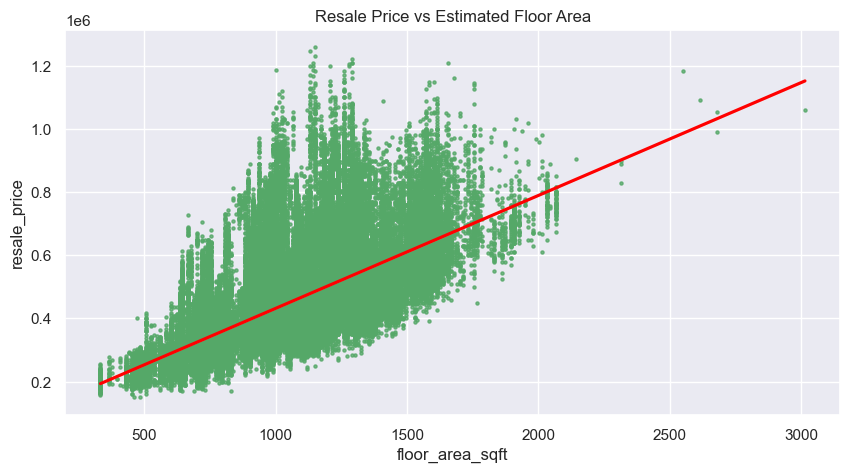

In [54]:
# Examining relationship between resale price and unit's floor area

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="floor_area_sqft", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Estimated Floor Area');

In general, bigger homes fetch higher prices.

In [55]:
# To use floor_area_sqft instead of floor_area_sqm for size of flat since they're substitutes

housing.drop(columns = 'floor_area_sqm', inplace = True)

In [56]:
# Creating a new variable to estimate the unit's age at the point of transaction 
# Existing time-related variables are less relevant because they look at absolute age of the unit
# Dropping the other variables 

housing['age_at_sale'] = housing['Tranc_Year'] - housing['lease_commence_date']

housing.drop(columns = 
             ['hdb_age','year_completed','Tranc_YearMonth','lease_commence_date'], 
             inplace = True)

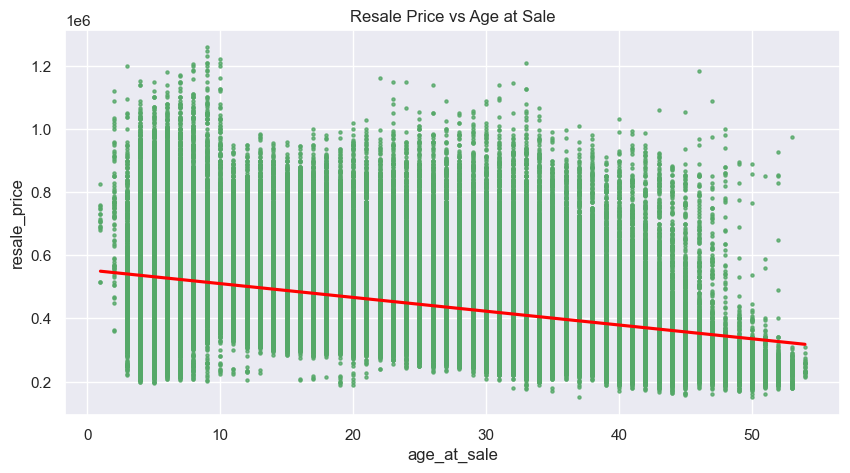

In [57]:
# Examining relationship between resale price and unit's age at point of transaction

fig, ax = plt.subplots(figsize=(10,5))

# sns.regplot(x="age_at_sale", y="resale_price", data=housing,
#            scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
# ax.set_title('Resale Price vs Age at Sale');

It seems like the older the unit, the lower the predicted resale price.

#### 6. Examining variables relating to schools

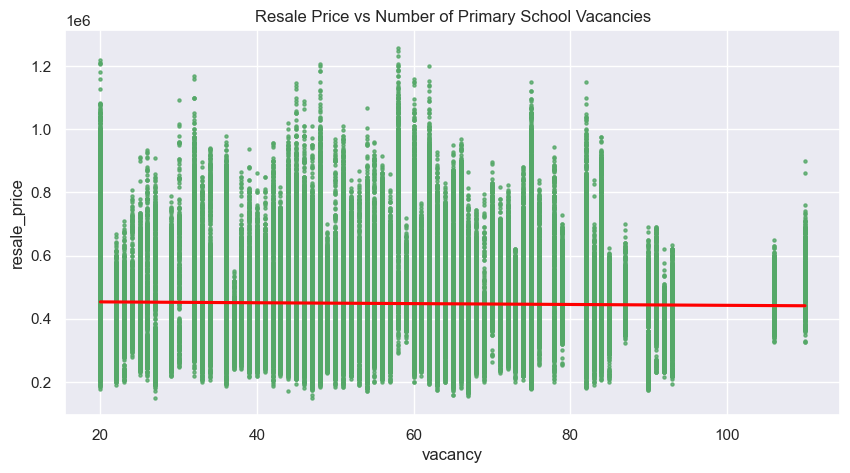

In [58]:
# Examining relationship between resale price and number of pri sch vacancies

fig, ax = plt.subplots(figsize=(10,5))

# sns.regplot(x="vacancy", y="resale_price", data=housing,
#            scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
# ax.set_title('Resale Price vs Number of Primary School Vacancies');

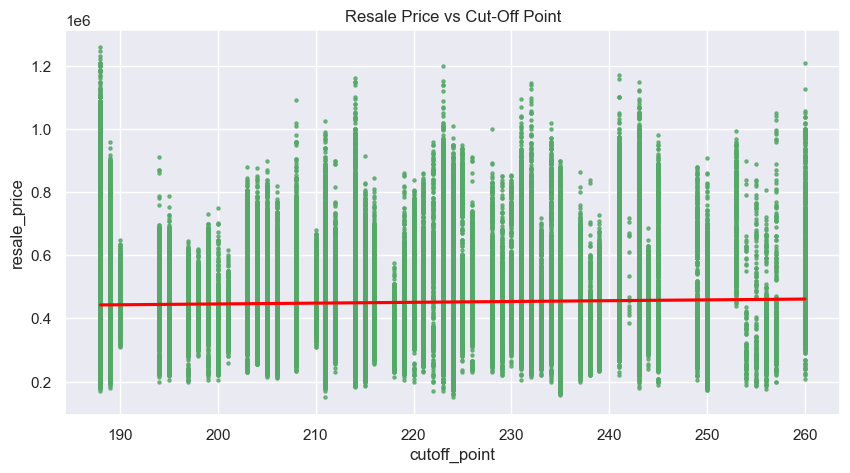

In [59]:
# Examining relationship between resale price and cut-off point

# fig, ax = plt.subplots(figsize=(10,5))

# sns.regplot(x="cutoff_point", y="resale_price", data=housing,
#            scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
# ax.set_title('Resale Price vs Cut-Off Point');

In [60]:
# To drop both variables given that resale price seems unaffected by either

housing.drop(columns = ['cutoff_point', 'vacancy'], inplace = True)

#### 7. Normalising the distributions of remaining variables

In [61]:
# Changing type of mrt and bus interchange to categorical since they're essentially boolean

housing['bus_interchange'] = housing['bus_interchange'].astype('object')


We'll be converting the following variables to categorical since we're interested to see which year or month might have higher/lower resale prices not looking at longitudinal trends over time, whereby we would convert to datetime type instead.

In [62]:
# Converting transaction year and month to categorical variables

housing['Tranc_Year'] = housing['Tranc_Year'].astype('object')
housing['Tranc_Month'] = housing['Tranc_Month'].astype('object')

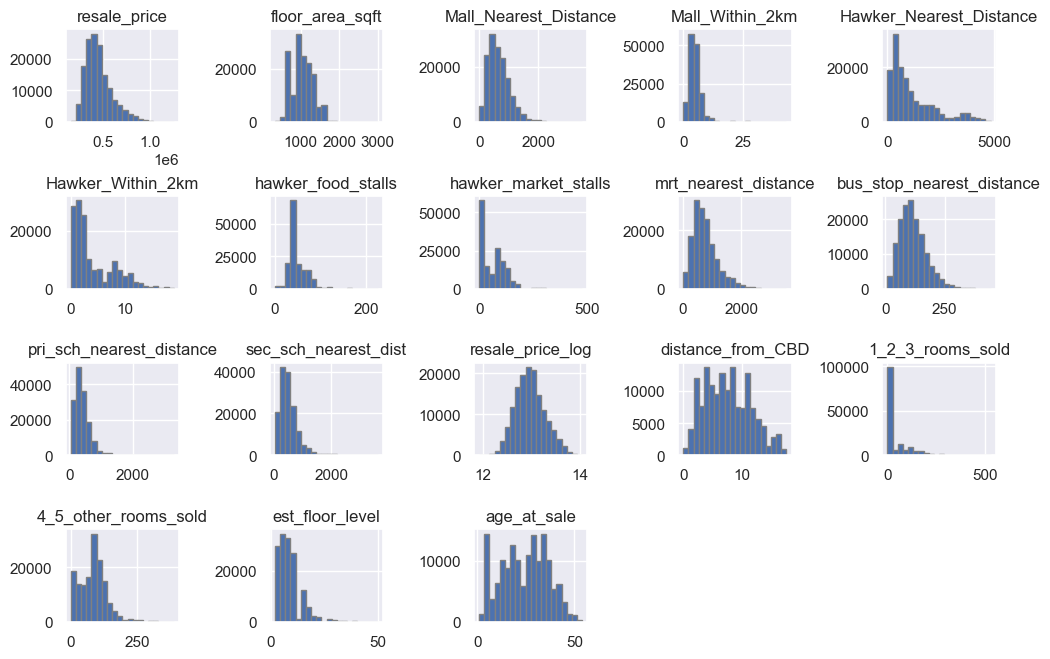

In [63]:
# Re-examining the distributions of remaining numerical variables

housing_num = housing.select_dtypes("number")
housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


Most variables have a right skew. We will log all numerical variables to normalise the distribution in preparation for linear regression modelling. 

In [66]:
# To log all variables with large scales, but first replace 0 with 0.01 since log(0) is undefined. 

cols2 = ['Mall_Nearest_Distance', 'Mall_Within_2km', 'Hawker_Within_2km', 
         'hawker_food_stalls', 'hawker_market_stalls', '1_2_3_rooms_sold', '4_5_other_rooms_sold']

result = [housing[col].replace({0:1}, inplace = True) for col in cols2]


In [68]:
# Applying log-scaling to numerical variables

housing_num.drop(columns = ['resale_price', 'resale_price_log'], inplace = True)
housing[housing_num.columns] = np.log(housing_num)

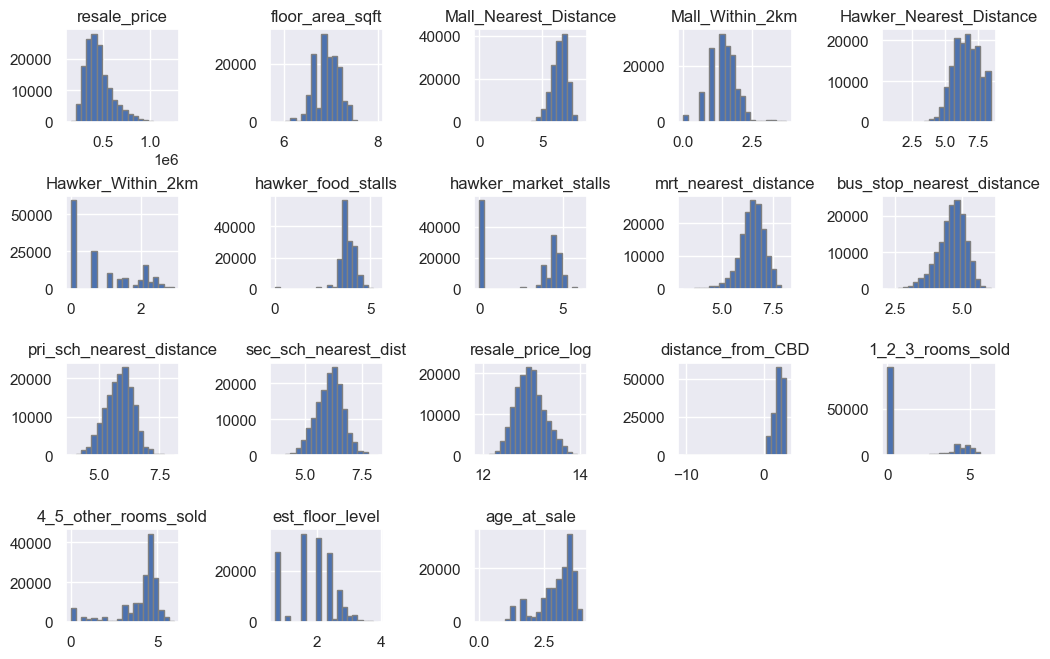

In [72]:
# examining the output after log transformation

housing.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

### Looking at Categorical variables

In general, while we want variables to add relevant information in a model to better predict resale prices, at the same time we want to minimise the risk of increasing the dimensionality of the dataset to the point where the model becomes unneccesarily complex, overfitted, or bloated (leading to excessively long processing times). We will keep in mind the number of one-hot encoded variables that will be created if we include a categorical feature into the model during feature selection.

#### 1. Flat Types

In [73]:
# Looking at flat type columns, which seem similar...

housing[['flat_model', 'full_flat_type', 'flat_type']].head()

,flat_model,full_flat_type,flat_type
0,Model A,4 ROOM Model A,4 ROOM
1,Improved,5 ROOM Improved,5 ROOM
2,Apartment,EXECUTIVE Apartment,EXECUTIVE
3,Model A,4 ROOM Model A,4 ROOM
4,Simplified,4 ROOM Simplified,4 ROOM


In [74]:
housing.groupby('flat_model')['resale_price'].median().sort_values(ascending = False)

flat_model
Type S2                   1000000.0
Type S1                    900000.0
Premium Apartment Loft     879000.0
Terrace                    815000.0
Multi Generation           765500.0
DBSS                       745000.0
Premium Maisonette         735000.0
Model A-Maisonette         700000.0
Adjoined flat              690500.0
Improved-Maisonette        670000.0
Maisonette                 652000.0
Apartment                  605000.0
Premium Apartment          465000.0
Improved                   450000.0
Model A                    412000.0
Model A2                   365000.0
Simplified                 350000.0
New Generation             340294.0
Standard                   328000.0
2-room                     245000.0
Name: resale_price, dtype: float64

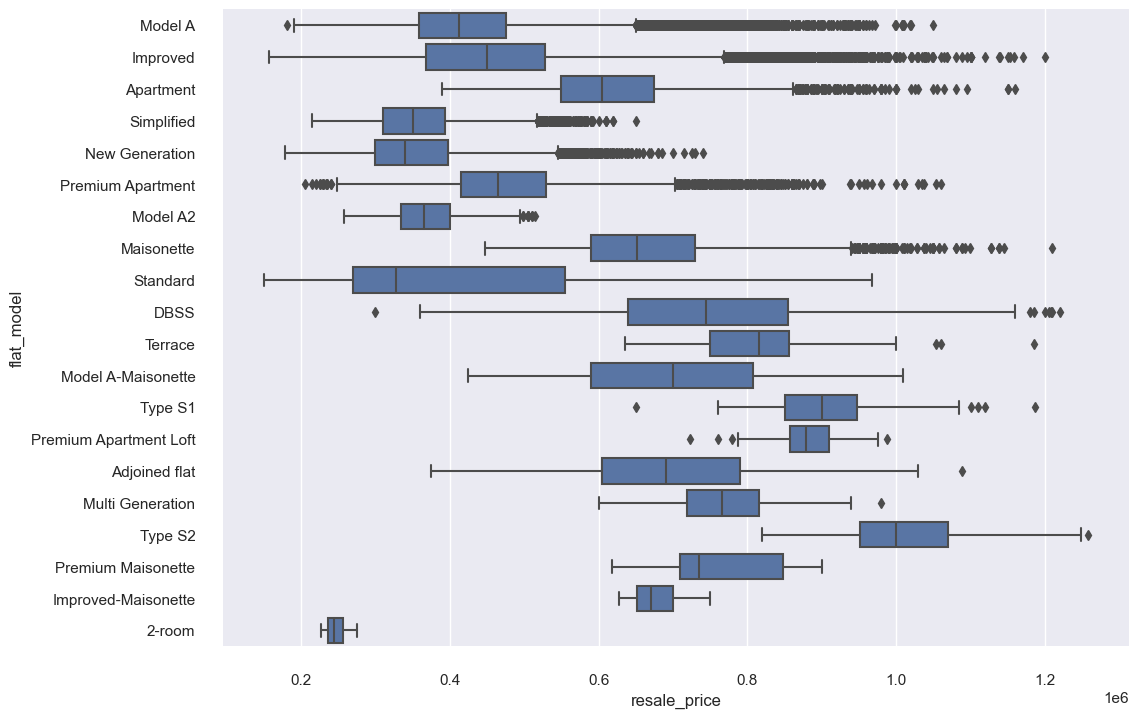

In [75]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(y="flat_model", x="resale_price",
            palette=["b"],
            data=housing)

sns.despine(offset=10, trim=True)


In [76]:
housing.groupby('full_flat_type')['resale_price'].mean().sort_values(ascending = False)

full_flat_type
5 ROOM Type S2                       1.019220e+06
4 ROOM Type S1                       9.050422e+05
4 ROOM Premium Apartment Loft        8.900216e+05
4 ROOM Terrace                       8.898889e+05
5 ROOM Premium Apartment Loft        8.483269e+05
5 ROOM DBSS                          8.387412e+05
3 ROOM Terrace                       8.108271e+05
MULTI-GENERATION Multi Generation    7.679920e+05
EXECUTIVE Premium Maisonette         7.605333e+05
EXECUTIVE Adjoined flat              7.587183e+05
5 ROOM Model A-Maisonette            6.978675e+05
4 ROOM DBSS                          6.958592e+05
5 ROOM Improved-Maisonette           6.775731e+05
EXECUTIVE Maisonette                 6.743608e+05
5 ROOM Adjoined flat                 6.679009e+05
EXECUTIVE Apartment                  6.203168e+05
5 ROOM Standard                      6.189874e+05
4 ROOM Adjoined flat                 6.090370e+05
EXECUTIVE Premium Apartment          5.591411e+05
5 ROOM Model A                     

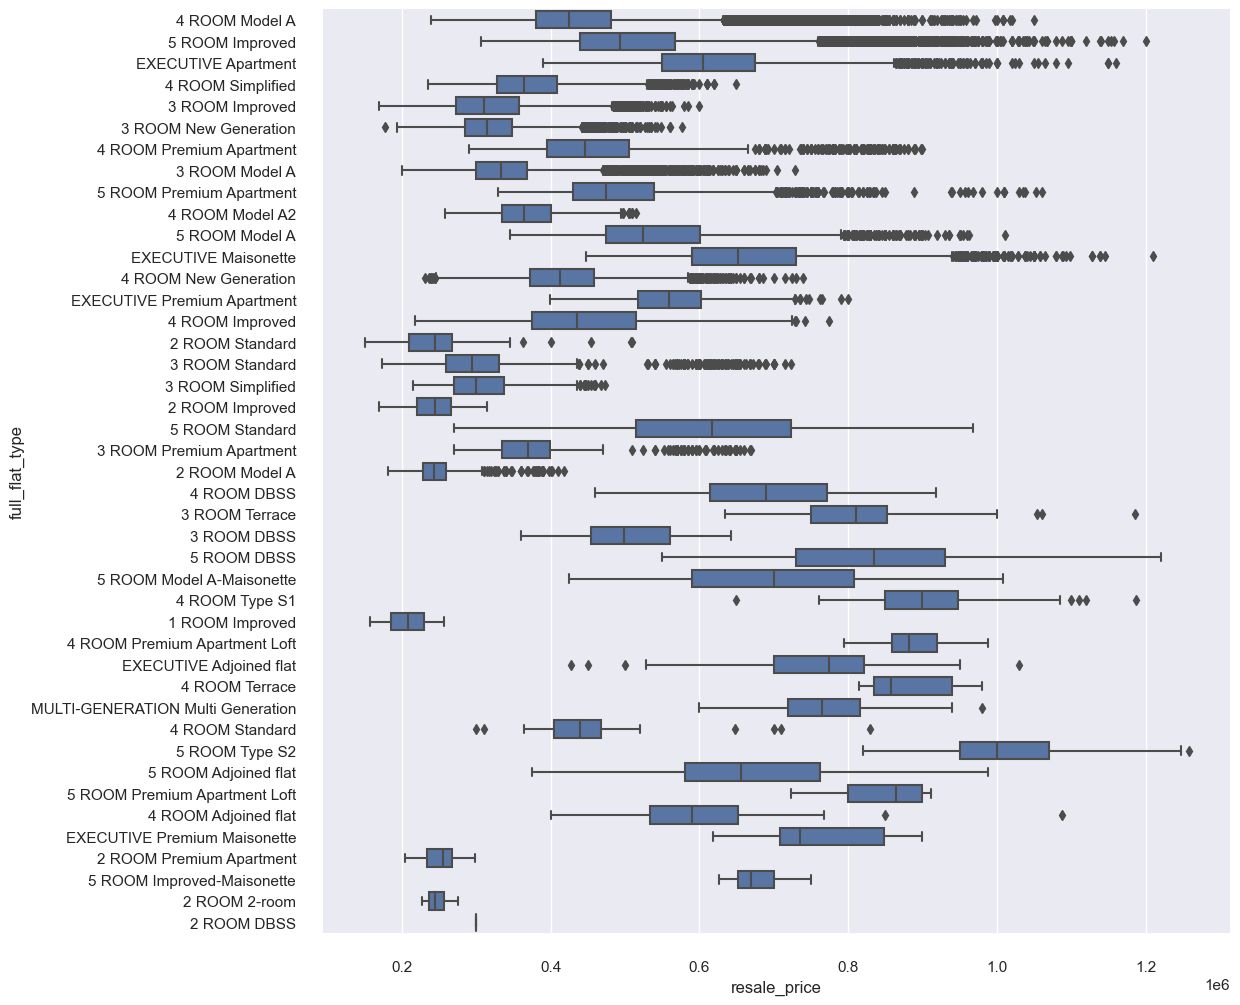

In [77]:
sns.set(rc={'figure.figsize':(11.7,12)})

sns.boxplot(y="full_flat_type", x="resale_price",
            palette=["b"],
            data=housing)
sns.despine(offset=10, trim=True)


In [78]:
housing.groupby('flat_type')['resale_price'].mean().sort_values(ascending = False)

flat_type
MULTI-GENERATION    767992.000000
EXECUTIVE           633933.020306
5 ROOM              536760.130100
4 ROOM              444244.851671
3 ROOM              326326.800662
2 ROOM              245532.248543
1 ROOM              207015.463415
Name: resale_price, dtype: float64

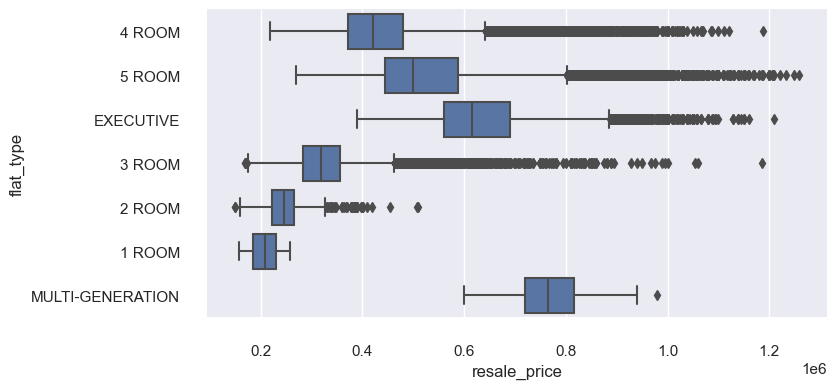

In [79]:
sns.set(rc={'figure.figsize':(8,4)})

sns.boxplot(y="flat_type", x="resale_price",
            palette=["b"],
            data=housing)
sns.despine(offset=10, trim=True)


We will drop full_flat_type due to its high granularity as a categorical variable (which would create a large number of dummy variables). To use flat_model and flat_type instead 

In [80]:
# Dropping full flat type

housing.drop(columns = ['full_flat_type'], inplace = True)

#### 2. Location and address

In [81]:
# Looking at all the categorical location-type columns... 

housing[['town', 'street_name', 'block', 'address', 'planning_area', 'mrt_name', 'bus_stop_name']].head()

,town,street_name,block,address,planning_area,mrt_name,bus_stop_name
0,KALLANG/WHAMPOA,UPP BOON KENG RD,3B,"3B, UPP BOON KENG RD",Kallang,Kallang,Blk 3B
1,BISHAN,BISHAN ST 13,153,"153, BISHAN ST 13",Bishan,Bishan,BLK 151A MKT
2,BUKIT BATOK,BT BATOK ST 25,289B,"289B, BT BATOK ST 25",Bukit Batok,Bukit Batok,Blk 289E
3,BISHAN,BISHAN ST 22,232,"232, BISHAN ST 22",Bishan,Bishan,Opp Bishan Nth Shop Mall
4,YISHUN,YISHUN ST 81,876,"876, YISHUN ST 81",Yishun,Khatib,Blk 873


In [82]:
# Calculating the average resale price by mrt station

mrt_mean_price = housing.groupby('mrt_name')['resale_price'].mean().sort_values(ascending = False)

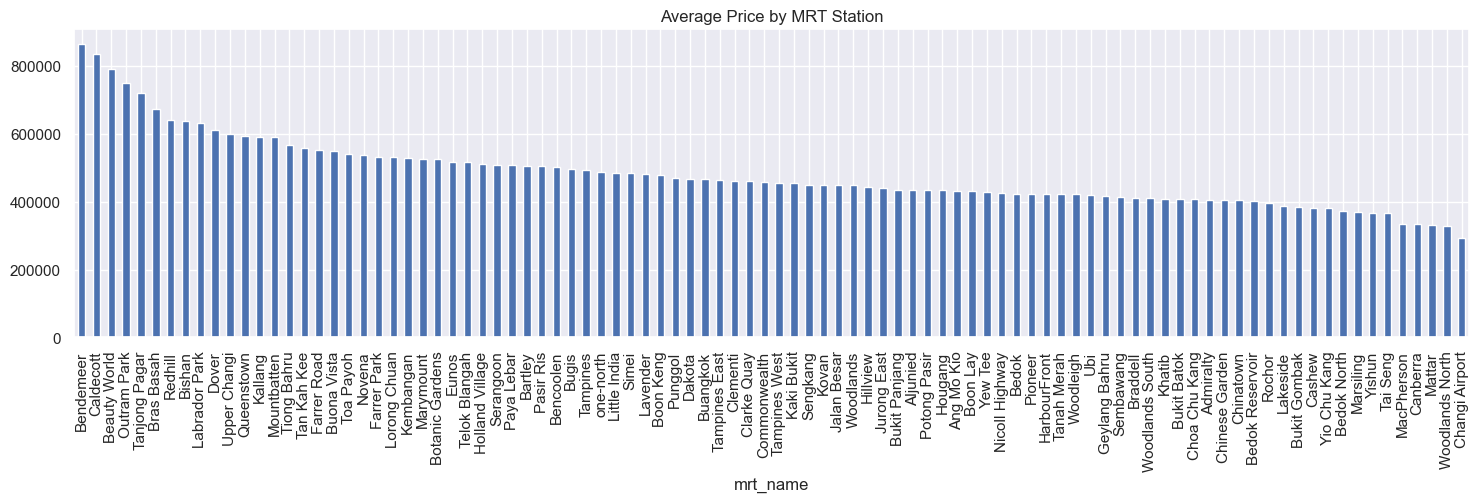

In [83]:
# Visualising the mean resale price by mrt station

mrt_mean_price.plot.bar(figsize=(18,4)).set(title='Average Price by MRT Station')
plt.show()

There are over 1.6k possible values in bus_stop_name. Creates too many dimensions with limited info (alot of 0s and a single 1 per column) We will drop this from the model. 

In [84]:
bus_stop_resale = housing.groupby('bus_stop_name')['resale_price'].mean().sort_values(ascending = False)
bus_stop_resale.head()

bus_stop_name
Opp Blk 317                1.026444e+06
Bef The Pinnacle@Duxton    9.625007e+05
Pei Hwa Presby Pr Sch      9.339235e+05
Queenstown Polyclinic      9.186667e+05
Blk 101C CP                8.906057e+05
Name: resale_price, dtype: float64

In [85]:
# Drop town, street name, address, mrt_name, to use 'planning_area' for location
# To also drop bus_stop_name due to granularity issues - too many small counts

housing.drop(columns = ['town', 'street_name', 'block', 'address', 'mrt_name','bus_stop_name'], inplace = True)

In [86]:
# Bus interchange on resale price

housing.groupby('bus_interchange')['resale_price'].mean()

bus_interchange
0    448148.348539
1    449090.781403
Name: resale_price, dtype: float64

The presence of a bus interchange doesn't seem to affect resale price much, probably because people just need a nearby bus stop to access a range of possible buses to their destination rather than an interchange. Will drop this variable.

In [87]:
housing.drop(columns = 'bus_interchange', inplace = True)

#### 3. Amenities

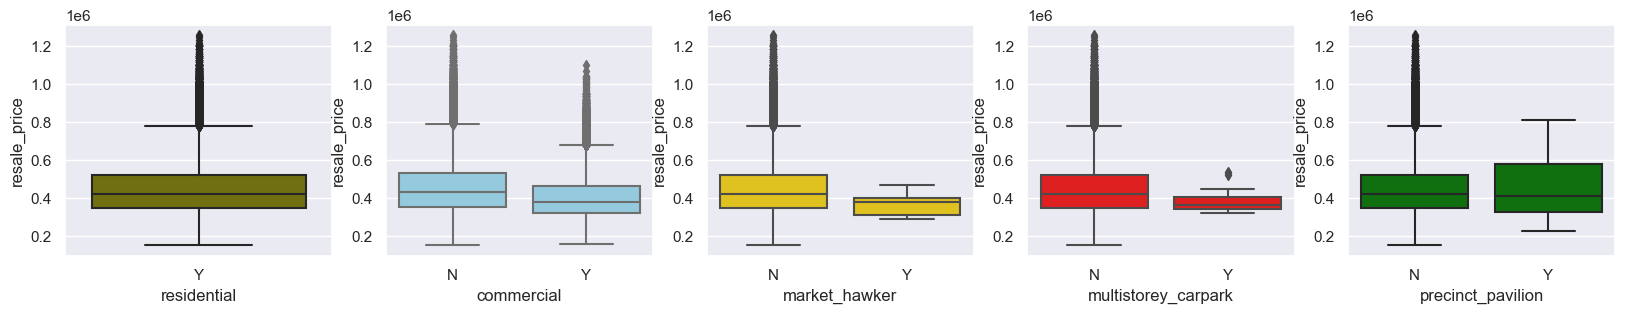

In [88]:
# Looking at amenity-related variables by relationship to resale price

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(20, 3))
df = housing

sns.boxplot(data=df, x="residential", y = "resale_price", color="olive", ax=axs[0])
sns.boxplot(data=df, x="commercial", y = "resale_price", color="skyblue", ax=axs[1])
sns.boxplot(data=df, x="market_hawker", y = "resale_price", color="gold", ax=axs[2])
sns.boxplot(data=df, x="multistorey_carpark", y = "resale_price", color="red", ax=axs[3])
sns.boxplot(data=df, x="precinct_pavilion", y = "resale_price", color="green", ax=axs[4])

plt.show()

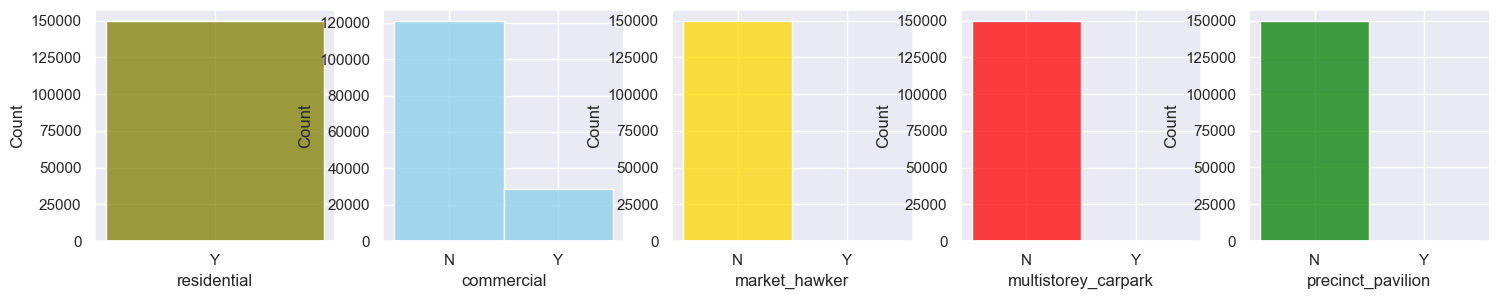

In [89]:
# Looking at amenity-related variables by count

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(18, 3))
df = housing

sns.histplot(data=df, x="residential",  color="olive", ax=axs[0])
sns.histplot(data=df, x="commercial",  color="skyblue", ax=axs[1])
sns.histplot(data=df, x="market_hawker",  color="gold", ax=axs[2])
sns.histplot(data=df, x="multistorey_carpark",  color="red", ax=axs[3])
sns.histplot(data=df, x="precinct_pavilion", color="green", ax=axs[4])

plt.show()

In [90]:
housing.residential.value_counts(normalize = True)

Y    1.0
Name: residential, dtype: float64

In [91]:
housing.commercial.value_counts(normalize = True)

N    0.80807
Y    0.19193
Name: commercial, dtype: float64

In [92]:
housing.market_hawker.value_counts(normalize = True)

N    0.9999
Y    0.0001
Name: market_hawker, dtype: float64

In [93]:
housing.multistorey_carpark.value_counts(normalize = True)

N    0.99972
Y    0.00028
Name: multistorey_carpark, dtype: float64

In [94]:
housing.precinct_pavilion.value_counts(normalize = True)

N    0.999246
Y    0.000754
Name: precinct_pavilion, dtype: float64

In [95]:
# Keeping only commercial and dropping the rest due to sparsity of data. 

housing.drop(columns = ['residential','market_hawker','multistorey_carpark', 
                        'precinct_pavilion'], inplace = True)

#### 4. Primary and Secondary School 

In [96]:
# Calculating the average resale price by mrt station

pri_sch_name_mean_price = housing.groupby('pri_sch_name')['resale_price'].mean().sort_values(ascending = False)

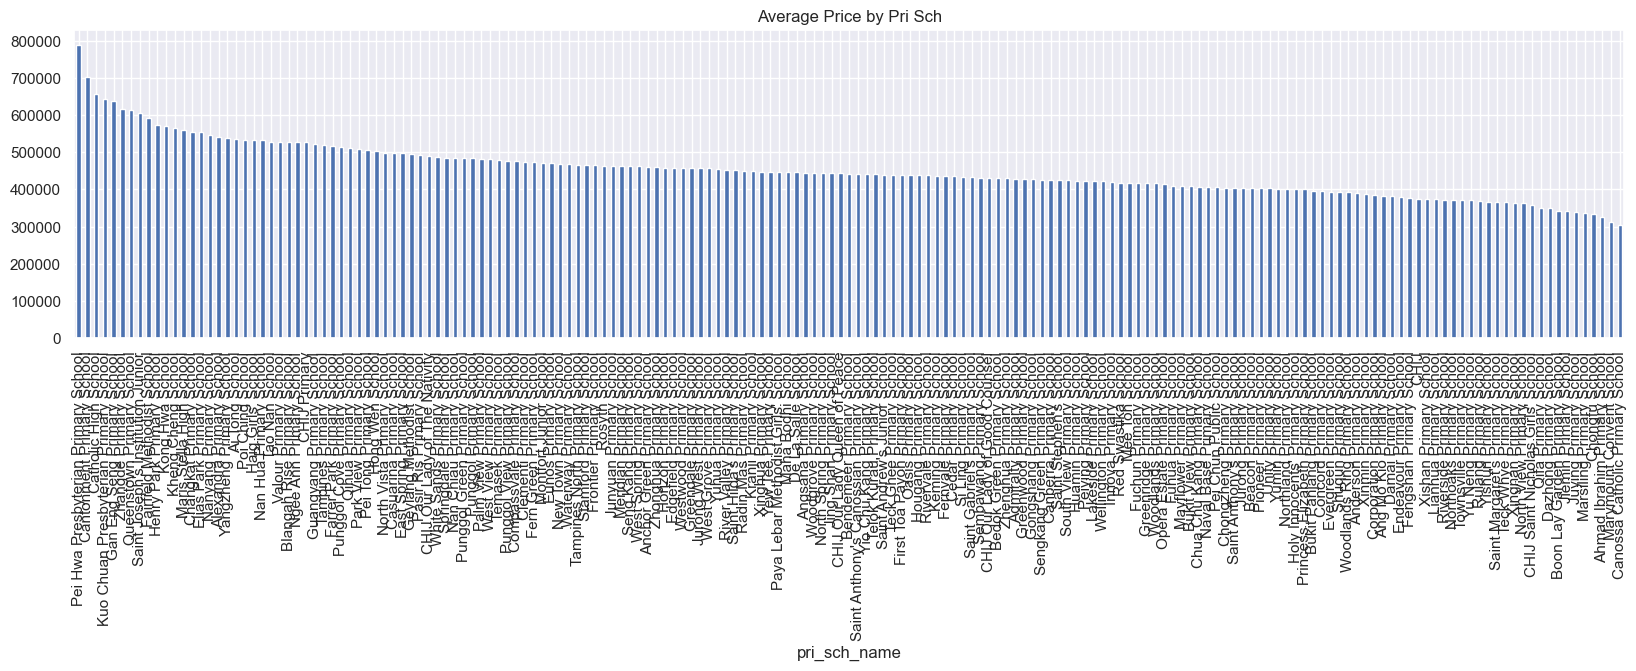

In [97]:
# Visualising the mean resale price by mrt station

pri_sch_name_mean_price.plot.bar(figsize=(20,4)).set(title='Average Price by Pri Sch')
plt.show()

In [98]:
# Calculating the average resale price by mrt station

sec_sch_name_mean_price = housing.groupby('sec_sch_name')['resale_price'].mean().sort_values(ascending = False)

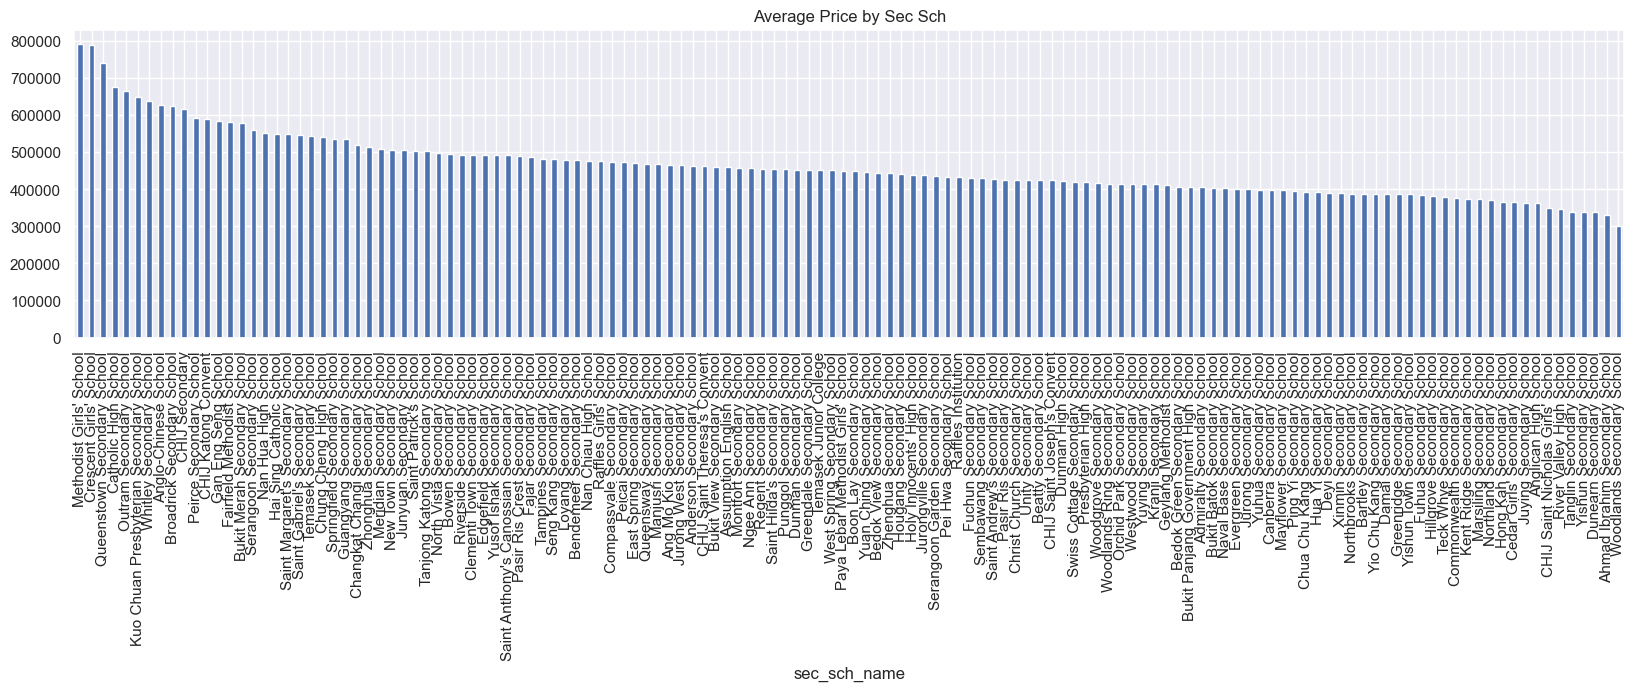

In [99]:
# Visualising the mean resale price by mrt station

sec_sch_name_mean_price.plot.bar(figsize=(20,4)).set(title='Average Price by Sec Sch')
plt.show()

While schools names seem to have an effect on resale price, we'll drop them to prevent an increase in dimensionality that might cause model overfitting and increase complexity without explaining much of the dependent variable's variance.

In [100]:
housing.drop(columns = ['pri_sch_name','sec_sch_name'], inplace = True)

#### 5. Transaction Year and Month

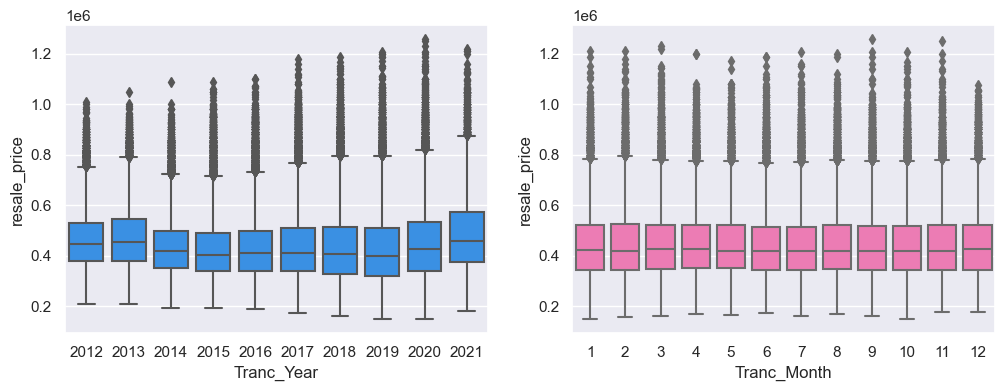

In [101]:
# Looking at the year and month distributions

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(12,4))
df = housing

sns.boxplot(data=df, x="Tranc_Year", y = "resale_price", color="dodgerblue", ax=axs[0])
sns.boxplot(data=df, x="Tranc_Month", y = "resale_price", color="hotpink", ax=axs[1])

plt.show()

Looks like the year of transaction has some impact on resale price, while there are minimal differences by month. We will drop transaction month from consideration as a predictor.

In [102]:
# Dropping transaction month as it doesn't have much variation in relation to resale price

housing.drop(columns = ['Tranc_Month'], inplace = True)

### Looking at skew and multicollinearity

In [103]:
# Checking for skewness of variables

housing.skew().sort_values(ascending=False).round(2)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_11170/3820577826.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.skew().sort_values(ascending=False).round(2)


resale_price                 1.09
1_2_3_rooms_sold             0.67
Hawker_Within_2km            0.42
resale_price_log             0.26
Mall_Within_2km              0.14
id                           0.00
Tranc_Year                  -0.14
pri_sch_nearest_distance    -0.17
sec_sch_nearest_dist        -0.18
Hawker_Nearest_Distance     -0.21
floor_area_sqft             -0.35
est_floor_level             -0.36
hawker_market_stalls        -0.42
bus_stop_nearest_distance   -0.54
mrt_nearest_distance        -0.60
Mall_Nearest_Distance       -0.74
age_at_sale                 -1.09
4_5_other_rooms_sold        -1.91
distance_from_CBD           -2.46
hawker_food_stalls          -3.50
dtype: float64

Data is not too skewed for most variables.

In [109]:
housing.head()

,id,flat_type,flat_model,resale_price,Tranc_Year,floor_area_sqft,commercial,planning_area,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,sec_sch_nearest_dist,sec_sch_name,resale_price_log,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale
0,88471,4 ROOM,Model A,680000.0,2016,6.876017,N,Kallang,6.997679,1.945910,5.041833,2.564949,4.430817,4.094345,5.799344,3.381926,7.037584,Geylang Methodist School,7.037584,Geylang Methodist School,13.429848,1.261663,0.0,4.955827,2.397895,2.302585
1,122598,5 ROOM,Improved,665000.0,2012,7.243742,N,Bishan,6.764971,1.098612,6.461706,1.945910,4.382027,4.343805,6.806453,4.064019,6.029741,Kuo Chuan Presbyterian Primary School,6.104557,Kuo Chuan Presbyterian Secondary School,13.407542,0.851318,0.0,4.718499,2.079442,3.218876
2,170897,EXECUTIVE,Apartment,838000.0,2013,7.346021,N,Bukit Batok,7.285904,1.386294,7.474252,0.000000,4.430817,4.553877,7.196126,5.369465,6.212304,Keming Primary School,5.193371,Yusof Ishak Secondary School,13.638773,2.227732,0.0,4.499810,2.639057,2.772589
3,86070,4 ROOM,Model A,550000.0,2012,7.010936,Y,Bishan,6.856646,1.386294,6.587846,2.197225,3.465736,4.454347,6.810642,3.770379,5.964904,Catholic High School,5.964904,Catholic High School,13.217674,0.799040,0.0,4.317488,1.098612,2.995732
4,153632,4 ROOM,Simplified,298000.0,2017,6.795048,N,Yishun,6.592732,0.693147,7.339636,0.000000,3.806662,0.000000,6.021856,4.863084,5.994462,Naval Base Primary School,5.743085,Orchid Park Secondary School,12.604849,1.328843,0.0,3.871201,0.693147,3.401197


In [107]:
# final dataset for modelling 

housing.shape

(149805, 26)

### Exporting data

In [108]:
# Save as csv file 
housing.to_csv('./housing3.csv')  